In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# –ü—É—Ç—å –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
path1 = 'C:/Users/LEGION/Desktop/notebooks/–≤–µ—Å–µ–Ω–Ω–∏–π —Å–µ–º/–Ω–µ–π—Ä–æ–Ω–∫–∏/lab2_opencv/DSC02692.JPG'
path2 = 'C:/Users/LEGION/Desktop/notebooks/–≤–µ—Å–µ–Ω–Ω–∏–π —Å–µ–º/–Ω–µ–π—Ä–æ–Ω–∫–∏/lab2_opencv/DSC02694.JPG'

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# –í–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫–∞–º–µ—Ä—ã
K = np.array([[6.05304386e+03, 0.00000000e+00, 2.54106629e+03],
              [0.00000000e+00, 6.03790771e+03, 1.30293217e+03],
              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–∏—Å—Ç–æ—Ä—Å–∏–∏
dist_coeffs = np.array([[-1.75617496e-01,  3.62500911e+00,  3.27014250e-03, 
                         3.28190397e-03, -2.11790265e+01]])


In [2]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ö–æ—Ä–æ—à–∏—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π
good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append(m)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç —Ç–æ—á–µ–∫
pts1 = np.float32([kp1[m.queryIdx].pt for m in good])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good])

print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö–æ—Ä–æ—à–∏—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π:", len(good))


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ö–æ—Ä–æ—à–∏—Ö —Å–æ–≤–ø–∞–¥–µ–Ω–∏–π: 544


In [3]:
E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, T, mask = cv2.recoverPose(E, pts1, pts2, K)

print("–ú–∞—Ç—Ä–∏—Ü–∞ –ø–æ–≤–æ—Ä–æ—Ç–∞ R:\n", R)
print("\n–í–µ–∫—Ç–æ—Ä —Å–º–µ—â–µ–Ω–∏—è T:\n", T)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø—Ä–æ–µ–∫—Ü–∏–æ–Ω–Ω—ã—Ö –º–∞—Ç—Ä–∏—Ü
P1 = K @ np.hstack((np.eye(3), np.zeros((3, 1))))
P2 = K @ np.hstack((R, T))


–ú–∞—Ç—Ä–∏—Ü–∞ –ø–æ–≤–æ—Ä–æ—Ç–∞ R:
 [[ 0.66820995 -0.06821106 -0.74083919]
 [ 0.08276397  0.99642257 -0.01709323]
 [ 0.73935484 -0.04989292  0.6714649 ]]

–í–µ–∫—Ç–æ—Ä —Å–º–µ—â–µ–Ω–∏—è T:
 [[0.84614687]
 [0.05317622]
 [0.53029026]]


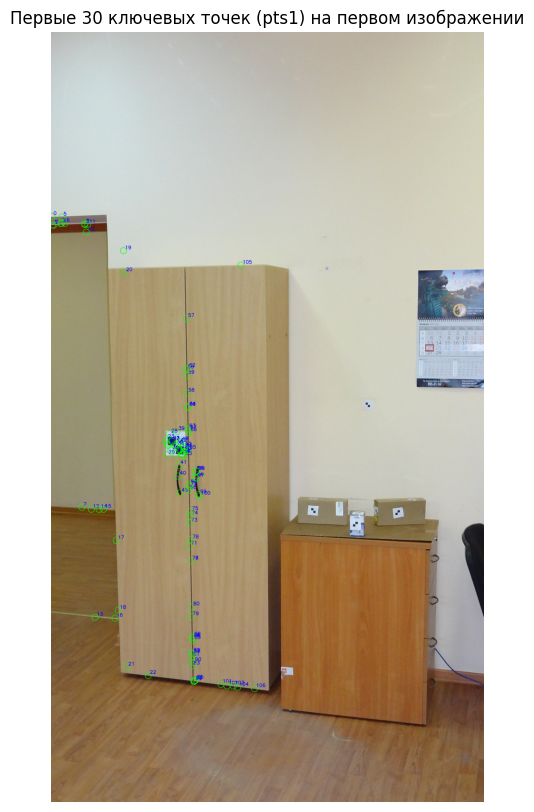

True

In [4]:
img_vis = img1.copy()

# –†–∏—Å—É–µ–º –ø–µ—Ä–≤—ã–µ 30 –∫–ª—é—á–µ–≤—ã—Ö —Ç–æ—á–µ–∫
for i in range(107):
    x, y = map(int, pts1[i])
    cv2.circle(img_vis, (x, y), 20, (0, 255, 0), 2)
    cv2.putText(img_vis, str(i), (x + 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
plt.title("–ü–µ—Ä–≤—ã–µ 30 –∫–ª—é—á–µ–≤—ã—Ö —Ç–æ—á–µ–∫ (pts1) –Ω–∞ –ø–µ—Ä–≤–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏")
plt.axis('off')
plt.show()
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
cv2.imwrite("keypoints_marked.jpg", img_vis)


In [5]:
# –ú–∞—Å—à—Ç–∞–± –ø–æ —Ç–æ—á–∫–∞–º 105 (–≤–µ—Ä—Ö) –∏ 106 (–Ω–∏–∑) –¥–≤–µ—Ä–∏
i1, i2 = 105, 106

pt1_top = pts1[i1]
pt1_bottom = pts1[i2]
pt2_top = pts2[i1]
pt2_bottom = pts2[i2]

top_3d = cv2.triangulatePoints(P1, P2, pt1_top.reshape(2, 1), pt2_top.reshape(2, 1))
bottom_3d = cv2.triangulatePoints(P1, P2, pt1_bottom.reshape(2, 1), pt2_bottom.reshape(2, 1))

top_3d /= top_3d[3]
bottom_3d /= bottom_3d[3]

# –í–∏—Ä—Ç—É–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏
door_virtual = np.linalg.norm(top_3d[:3] - bottom_3d[:3])

# –†–µ–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ –¥–≤–µ—Ä–∏ (–∏–∑ –¢–ó)
real_door_mm = 2000.0

# –ú–∞—Å—à—Ç–∞–±
scale_factor = real_door_mm / door_virtual

print(f"üìê –í–∏—Ä—Ç—É–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ –¥–≤–µ—Ä–∏: {door_virtual:.4f} –µ–¥.")
print(f"üìè –ú–∞—Å—à—Ç–∞–± (–º–º –Ω–∞ –µ–¥.): {scale_factor:.2f}")


üìê –í–∏—Ä—Ç—É–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ –¥–≤–µ—Ä–∏: 0.3471 –µ–¥.
üìè –ú–∞—Å—à—Ç–∞–± (–º–º –Ω–∞ –µ–¥.): 5761.67


In [6]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—ã–±—Ä–∞–Ω–Ω—ã–µ —Ç–æ—á–∫–∏ –Ω–∞ —à–∫–∞—Ñ—É
i3, i4 = 105, 106

pt1_top = pts1[i3]
pt1_bottom = pts1[i4]
pt2_top = pts2[i3]
pt2_bottom = pts2[i4]

# –¢—Ä–∏–∞–Ω–≥—É–ª—è—Ü–∏—è 3D-—Ç–æ—á–µ–∫
top_3d = cv2.triangulatePoints(P1, P2, pt1_top.reshape(2, 1), pt2_top.reshape(2, 1))
bottom_3d = cv2.triangulatePoints(P1, P2, pt1_bottom.reshape(2, 1), pt2_bottom.reshape(2, 1))

top_3d /= top_3d[3]
bottom_3d /= bottom_3d[3]

# –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ –≤ –≤–∏—Ä—Ç—É–∞–ª—å–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö
height_virtual = np.linalg.norm(top_3d[:3] - bottom_3d[:3])

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–∞—Å—à—Ç–∞–±, —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—ã–π –ø–æ –¥–≤–µ—Ä–∏
height_real_mm = height_virtual * scale_factor

print(f"‚úÖ –í–∏—Ä—Ç—É–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —à–∫–∞—Ñ–∞: {height_virtual:.4f} –µ–¥.")
print(f"üìè –†–µ–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —à–∫–∞—Ñ–∞: {height_real_mm:.2f} –º–º")


‚úÖ –í–∏—Ä—Ç—É–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —à–∫–∞—Ñ–∞: 0.3471 –µ–¥.
üìè –†–µ–∞–ª—å–Ω–∞—è –≤—ã—Å–æ—Ç–∞ —à–∫–∞—Ñ–∞: 2000.00 –º–º
